In [1]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("employee_promotion.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [5]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [6]:
df.isnull()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,False,True,False,False,False,False,False,False,False,True,False


In [7]:
df["education"].fillna("Bachelor's",inplace=True)
df["previous_year_rating"].fillna("4.0",inplace=True)
df["avg_training_score"].fillna("63.712238",inplace=True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,63.712238,0


In [8]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
df.mean()

C:\Users\patan\AppData\Local\Temp/ipykernel_1924/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


employee_id          39195.830627
no_of_trainings          1.253011
age                     34.803915
length_of_service        5.865512
awards_won               0.023172
is_promoted              0.085170
dtype: float64

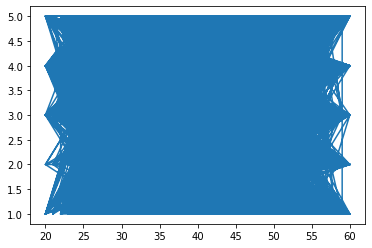

In [10]:
plt.plot(df["age"],df["previous_year_rating"])
plt.show()

In [11]:
df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [12]:
df.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel,previous_year_rating,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,5.0,49.0
1,Operations,region_22,Bachelor's,m,other,5.0,60.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.0,50.0
3,Sales & Marketing,region_23,Bachelor's,m,other,1.0,50.0
4,Technology,region_26,Bachelor's,m,other,3.0,73.0
...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,3.0,78.0
54804,Operations,region_27,Master's & above,f,other,2.0,56.0
54805,Analytics,region_1,Bachelor's,m,other,5.0,79.0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1.0,63.712238


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

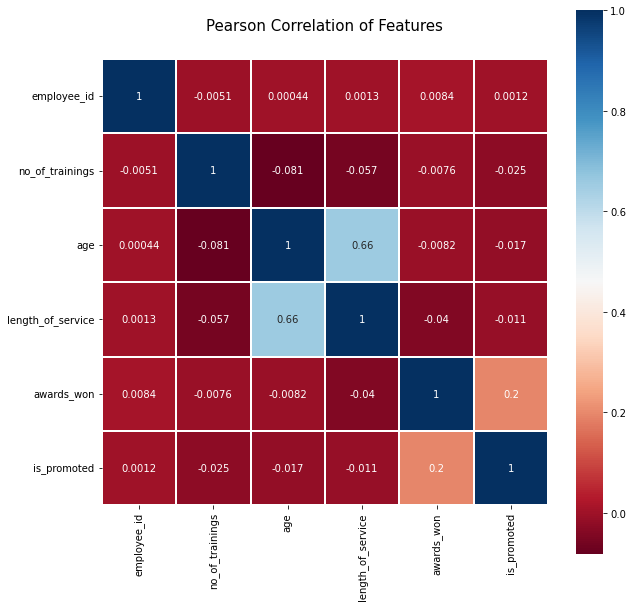

In [13]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap,annot=True)

In [14]:

df.drop("region",inplace=True,axis=1)
df.drop("gender",inplace=True,axis=1)
df.drop("age",inplace=True,axis=1)
df.drop("department",inplace=True,axis=1)
df.drop("recruitment_channel",inplace=True,axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
edu=['education']
df[edu]=df[edu].apply(LabelEncoder().fit_transform)

In [16]:
x=df.drop('is_promoted',axis=1)
y=df['is_promoted']
x=df.drop('is_promoted',axis=1)
y=df['is_promoted']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [18]:
from sklearn.linear_model import LogisticRegression
alg=LogisticRegression()
alg.fit(x_train,y_train)
y_pred=alg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print(accuracy_score(y_pred,y_test))

0.9146839877390162


array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'length_of_service'}>],
       [<AxesSubplot:title={'center':'awards_won'}>,
        <AxesSubplot:title={'center':'is_promoted'}>]], dtype=object)

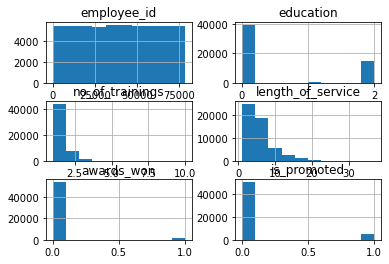

In [21]:
df.hist()

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9157787184352649
